# Logistic Regression

Logistic Regression is a supervised learning algorithm for classification problems. It is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

### Dataset

The dataset used for this illustration is  Human Activity Recognition with Smartphones database, which was built from the recordings of study participants who carried a smartphone with an embedded inertial sensor while performing activities of daily living.

### Objective:
    The objective is to classify the activities into one of the six following categories: 
        walking, 
        walking upstairs, 
        walking downstairs, 
        sitting, 
        standing, 
        and laying.

### Importing libraries

   **pandas**   
   **numpy**                   
   **matplotlib**             -> visualizing data
   
   **sklearn.linear_model**   -> to LogisticRegression module
   
   **seaborn**                -> visualizing data
   
   **sklearn.metrics**        -> modules to measure the performance score of classificatiopn algorithm
   
   **sklearn.preprocessing**   -> LabelEncoder module that encodes target labels with value between 0 and n_classes-1
   
   **StratifiedShuffleSplit**  -> Provides train/test indices to split data in train/test sets. This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report,roc_auc_score, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import StratifiedShuffleSplit

Reading the data into a variable

In [2]:
data = pd.read_csv("Human_Activity_Recognition_Using_Smartphones_Data.csv")

In [3]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [4]:
data.shape

(10299, 562)

In [5]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 44.2+ MB


In [6]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

The dataset has 10299 rows and 562 columns. Out of 562 columns, 561 columns are float type and the target column is object type.

*Let's see the various activities in the target column:*

In [7]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

*Encode the target column variables into numericals using the LabelEncoder.*

In [8]:
le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data.Activity.sample(5)

1119    4
8148    1
5113    1
1384    0
7090    3
Name: Activity, dtype: int32

variables are encoded with the numbers as alonmg the alphabetical order:

    Laying => 0
    Sitting => 1
    Standing => 2
    Walking => 3
    Walking_Downstairs => 4
    Walking_Upstairs => 5

*The correlations between the dependent variables*

In [9]:
feature_col = data.columns[:-1]
corr_values = data[feature_col].corr()

In [10]:
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.036047,0.013241,-0.066233,0.027464,0.001902,-0.004984,0.027729,-0.002924,-0.009873,0.033533,...,-0.029273,0.042123,0.035684,-0.013009,0.010679,1.000000,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",0.034296,0.077627,-0.030748,-0.027123,-0.015784,-0.012196,-0.027097,-0.013411,-0.012800,-0.030908,...,-0.002618,-0.013065,-0.011829,-0.027478,0.023605,-0.112454,1.000000,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",-0.041021,-0.007513,0.003215,-0.374104,-0.381391,-0.353271,-0.371168,-0.378013,-0.355836,-0.384244,...,0.087571,-0.085226,-0.081971,0.008050,0.017534,-0.007095,0.024822,1.000000,-0.748249,-0.635231
"angle(Y,gravityMean)",0.034053,-0.005616,-0.012986,0.449425,0.506106,0.459092,0.444926,0.507947,0.460345,0.458832,...,-0.105752,0.087671,0.078010,0.003082,-0.007256,-0.006444,-0.004582,-0.748249,1.000000,0.545614


In [11]:
tril_index = np.tril_indices_from(corr_values)

for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN

The lower triangle of the correlation matrices are filled with nan values as they are unused.

In [12]:
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.748249,-0.635231
"angle(Y,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.545614


Now frame the correlation matrix with two columns and their correlation value:

In [13]:
corr_values = corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2', 0:'correlation'})
corr_values

,feature1,feature2,correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071
...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231


Now let's plot the correlation values in the histogram and see the high correlation frequencies.

In [14]:
corr_values['a']=corr_values.correlation.abs()
corr_values.a

0         0.128037
1         0.230302
2         0.004590
3         0.016785
4         0.036071
            ...   
157075    0.004582
157076    0.012549
157077    0.748249
157078    0.635231
157079    0.545614
Name: a, Length: 157080, dtype: float64

[Text(0.5, 0, 'Absolute Correlation'), Text(0, 0.5, 'Frequency')]

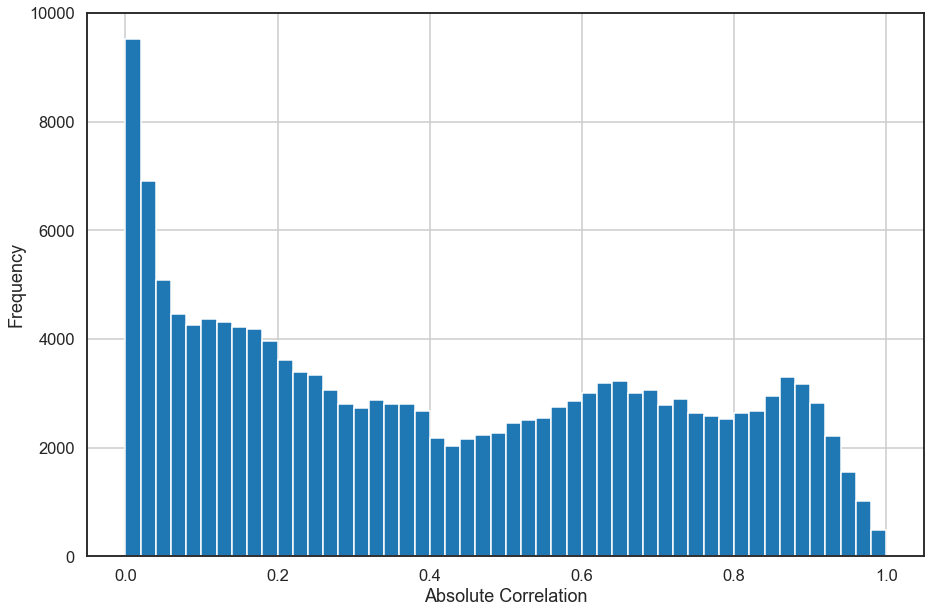

In [15]:
sns.set_context('talk')
sns.set_style('white')
ax= corr_values['a'].hist(bins=50, figsize=(15,10))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency')

There are more features that are having correlation values between 0.0. and 0.1 . These features are less correlated.

Now get the features with relatively high correlation values such that greater than 0.8. 

In [16]:
ca = corr_values.sort_values('correlation', ascending=False).query('a>0.8')
ca

,feature1,feature2,correlation,a
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


Out of 1,57,080 correlated features almost 22,815 feature pairs are highly correlated, that is greater than 0.8.

## Splitting dataset

splitting the data with StratifiedShuffleSplit having 3 number of splits and reshuffling iterations and test size of 30%

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_col], data.Activity))


X_train = data.loc[train_idx, feature_col]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_col]
y_test  = data.loc[test_idx, 'Activity']

As the dataset is very large the 'lbfgs' solver is failed to converge and hence using 'liblinear' solver

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

Now to automatically select the best hyperparameters, LogisticRegressionCV with appropriate parameters are passed and trained with 'l1' regularization.

#### Parameters:
    Cs => inverse of regularization strength(default=10)
    cv => 4 : cross validation generator(default => StratifiedKFolds)
    solver => 'liblinear'
    penalty => 'l1'(Lasso Regression)

In [19]:
from sklearn.linear_model import LogisticRegressionCV

lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

Now to automatically select the best hyperparameters, LogisticRegressionCV with appropriate parameters are passed and trained with 'l2' regularization.

#### Parameters:
    Cs => inverse of regularization strength(default=10)
    cv => 4 : cross validation generator(default => StratifiedKFolds)
    solver => 'liblinear'
    penalty => 'l2'(Ridge Regression)

In [20]:
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

Predicting and storing the prediction of each model and their probability in the lists and framing it into dataframe

In [21]:
y_pred = list()
y_prob = list()
coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr,lr_l1, lr_l2]

for lab, mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))

y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

#### Prediction of the models

In [22]:
y_pred

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0
...,...,...,...
3085,2,2,2
3086,3,3,3
3087,1,1,1
3088,1,1,1


#### Probability of the model predictions

In [23]:
y_prob

,lr,l1,l2
0,0.998939,0.998932,0.999757
1,0.988165,0.999612,0.999998
2,0.987592,0.999231,0.999907
3,0.981381,0.999142,0.994338
4,0.998277,1.000000,0.999997
...,...,...,...
3085,0.543470,0.641992,0.625801
3086,0.903354,0.988249,0.989380
3087,0.969642,0.983631,0.985954
3088,0.986840,0.997319,0.999029


### Evaluation metrics

The score metrics are:
    
    accuracy
    precision
    recall
    f1_score
    roc_auc_score
    

In [26]:
metrics = list()
cm = dict()

for lab in coeff_labels:
    precision = precision_score(y_test, y_pred[lab], average = 'weighted')
    recall = recall_score(y_test, y_pred[lab], average = 'weighted')
    fscore = precision_recall_fscore_support(y_test, y_pred[lab], average = 'weighted')[2]
    accuracy = accuracy_score(y_test, y_pred[lab])
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),  label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), average='weighted')
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore':fscore, 'accuracy':accuracy, 'auc':auc}, name=lab))

metrics  = pd.concat(metrics, axis=1)

In [27]:
metrics

,lr,l1,l2
precision,0.984144,0.982221,0.984148
recall,0.984142,0.982201,0.984142
fscore,0.984143,0.982207,0.984143
accuracy,0.984142,0.982201,0.984142
auc,0.990384,0.989170,0.990352


## Confusion matrix for each of the models

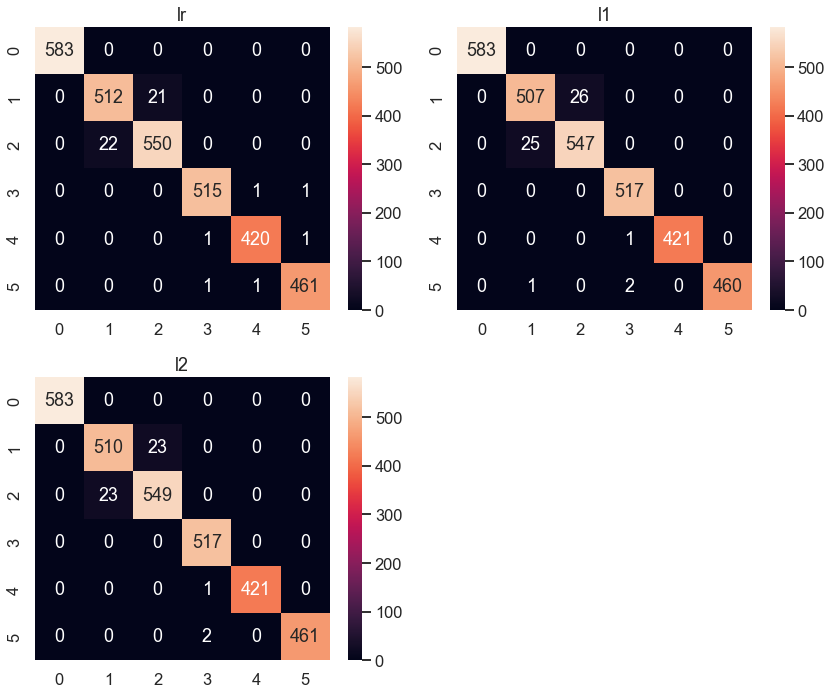

In [31]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()